##Učitavanje podataka i potrebnih biblioteka

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dfPortuguese = pd.read_csv("/content/drive/MyDrive/zp-projekt/Portuguese.csv")
dfPortuguese.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
dfPortuguese.shape

(649, 33)

In [ ]:
dfPortuguese.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
dfPortuguese.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

SKup podataka (dataset) sastoji se od 640 redaka s po 33 stupca podataka, ni u jednom stupcu nema nedostajućih podataka i podatci su mješavina kategoričkih i numeričkih podataka. Za naš izračun nećemo koristiti sve podatke nego ćemo se ograničiti na jedan od njihovih podskupova. Podatci koje ćemo izbaciti iz ciljanog skupa podataka su podatci povezani s izborima roditelja kao što su njihova razina obrazovanja, adrese i razlozi izbora škole jer vjerujemo da nemaju utecaj na spol djeteta.

## Analiza utjecaja spola na navike učenika

Korištenjem data seta o učenicima želimo provjeriti imaju li učenici različitog spola iste srednje škole navike po kojima bi mogli prepostaviti njihov spol. U obzir se uzimaju podatci o tome koliko učenici uče, njihove ocjene, kao i izlasci i količina alkohola koju konzumiraju.


##Izbacivanje nepotrebnih stupaca

In [ ]:
dfPortuguese.drop(['school','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob', 'reason','guardian','traveltime','nursery'], axis=1, inplace=True)

In [ ]:
dfPortuguese

,sex,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,F,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,F,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,F,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,F,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,3,1,no,no,no,yes,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,F,2,0,no,yes,no,no,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,F,2,0,no,no,no,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,M,1,0,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


##Analiza preostalih podataka

In [ ]:
dfPortuguese.describe()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


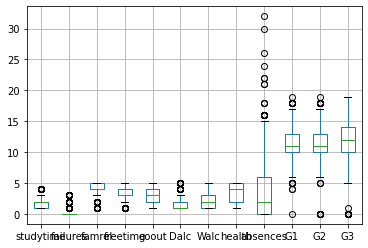

In [ ]:
dfPortuguese.boxplot()

Kategoričke varijable zatim pretvaramo u numeričke.

In [ ]:
dfPortuguese.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.paid.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.activities.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.higher.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.internet.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.romantic.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.sex.replace(('M', 'F'), (1, 0), inplace=True)

In [ ]:
dfPortuguese.dtypes

sex           int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

Sada je potrebno preostale podatke detaljnije proučiti. 

| stupac |objašnjenje | raspon |
| --- | --- | --- |
|sex       |   spol | 0/1 |
|studytime  |  vrijeme učenja| 1-4|
|failures    | broj palih ispita |0-3|
|schoolsup   | dopunska nastava|0/1|
|famsup      | dodatna pomoč s učenjem od obitelji|0/1|
|paid        | plačene instrukcije|0/1|
|activities   |pohađa izvansatavne aktivnosti|0/1|
|higher       |zanima ih više obrazovanje|0/1|
|internet     |ima pristup interetu|0/1|
|romantic     |u romantičnoj je vezi|0/1|
|famrel      | u dobrim odnosima s obitelji|1-5|
|freetime    | količina slobodnog vremana nakon škole|1-5|
|goout       | izazi s prijateljima|1-5|
|Dalc         |količina pića tjekom radnog dana|1-5|
|Walc         |količina pića vikendom|1-5|
|health       |zdrastveno stanje|1-5|
|absences     |broj izostanka|0-32|
|G1           |ocjena prvo polugodište|0-19|
|G2           |ocjene drugo polugodište|0-19|
|G3           |završna ocjena |0-19|



U ovoj tablici kao i ranijem box plot grafu primjećujemo da nam podatci nisu izraženi u istim skalama pa će biti potrebno skalirati podatke.

Text(0.5, 1.0, 'Matrica korelacije')

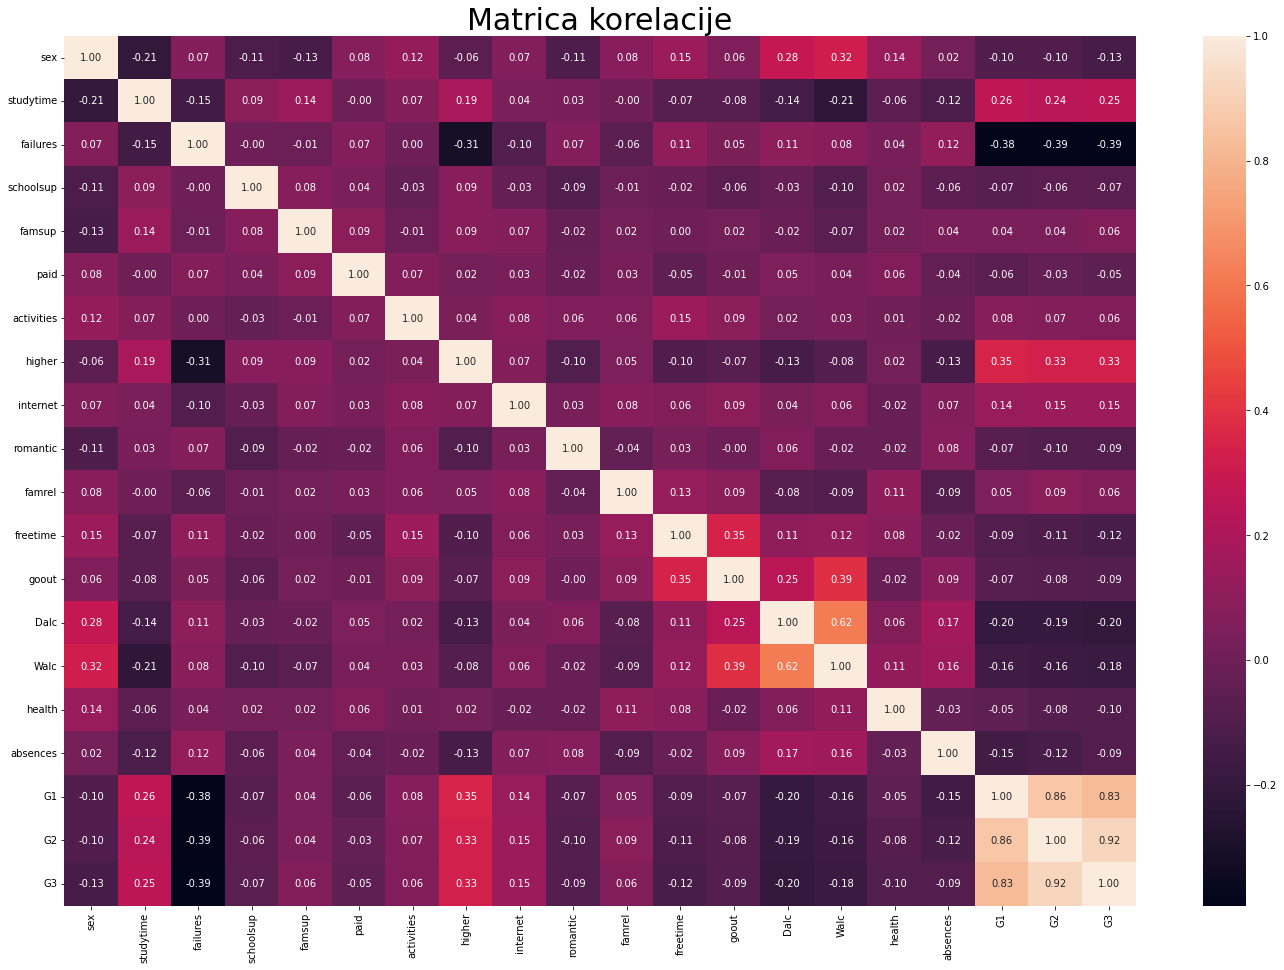

In [ ]:
corr = dfPortuguese.corr()
graph = sns.heatmap(corr, annot = True, fmt = '.2f')
graph.figure.set_size_inches(24, 16)
graph.set_title('Matrica korelacije', fontsize = 30)

Na matrici korelacije primjećujemo da je većina heatmapa ljubičaste boje, tj. da nema ni pretjerane pozitivne ni negativne korelacije između vrijednosti. Kako bismo se više u to uvjerili izbacit ćemo vrijednosti korelacije s našim traženim stupcem spola.

In [ ]:
dfPortuguese.corrwith(dfPortuguese['sex']).round(2)

sex           1.00
studytime    -0.21
failures      0.07
schoolsup    -0.11
famsup       -0.13
paid          0.08
activities    0.12
higher       -0.06
internet      0.07
romantic     -0.11
famrel        0.08
freetime      0.15
goout         0.06
Dalc          0.28
Walc          0.32
health        0.14
absences      0.02
G1           -0.10
G2           -0.10
G3           -0.13
dtype: float64

##Balansiranje klasa

Također nas zanima i koliko podataka o kojem spolu imamo.

In [ ]:
print("broj podataka o osobama ženskog spola je {0}, a {1} o osobama muškog spola ".format(dfPortuguese.shape[0]-dfPortuguese.sex.sum(),dfPortuguese.sex.sum()))

broj podataka o osobama ženskog spola je 383, a 266 o osobama muškog spola 


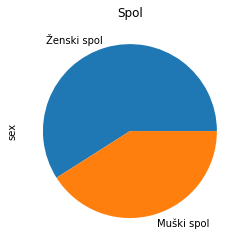

In [ ]:
dfPortuguese.sex.value_counts().plot(labels=['Ženski spol','Muški spol'],title="Spol",kind='pie')

S obzirom da je značajno veći broj podataka o ženama moramo prilagoditi naš dataset.

##Transformacije data seta


Važno je transformirati dataset tako da su osobe muškog i ženskog spola podjednako zastupljene.

Zatim je potrebno skalirati podatke kako im se ne bi prenapuhala vrijednost u odnosu na podatke mjerene na manjoj ljestvici.

Odlučili smo se za metodu Undersampling jer tako koristimo samo "stvarne" podatke i smanjili broj podataka o ženama na 266 da bi odgovaralo broju podataka o muškarcima.

In [ ]:
nMax = 266 #change to 2500

res = dfPortuguese.groupby('sex').apply(lambda x: x.sample(n=min(nMax, len(x))))

print(res['sex'].value_counts())

0    266
1    266
Name: sex, dtype: int64


In [ ]:
res

sex  studytime  failures  schoolsup  famsup  paid  activities  \
sex                                                                      
0   412    0          2         0          0       1     0           1   
    183    0          2         0          0       1     0           0   
    372    0          2         0          0       1     0           0   
    610    0          2         3          0       1     0           1   
    103    0          2         0          1       1     0           0   
...      ...        ...       ...        ...     ...   ...         ...   
1   117    1          1         0          0       0     0           1   
    335    1          2         0          0       1     0           1   
    272    1          3         0          0       0     0           0   
    107    1          3         0          0       1     0           1   
    123    1          1         0          0       1     0           1   

         higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
sex                                                                        
0   412       1         1         0       4         2      2     1     1   
    183       1         1         1       4         4      2     1     1   
    372       1         0         1       4         2      2     1     1   
    610       0         0         1       3         5      4     1     4   
    103       1         1         0       4         3      5     1     1   
...         ...       ...       ...     ...       ...    ...   ...   ...   
1   117       1         1         0       5         4      2     1     1   
    335       1         1         0       5         4      3     1     1   
    272       1         1         1       4         3      3     1     1   
    107       1         1         0       5         3      3     1     1   
    123       1         1         0       3         4      4     1     4   

         health  absences  G1  G2  G3  
sex                                    
0   412       3         0  14  17  17  
    183       3         0  16  16  17  
    372       3         4  14  13  13  
    610       1         0   8   0   0  
    103       2        16  11  10  10  
...         ...       ...  ..  ..  ..  
1   117       5         6  14  14  15  
    335       2         0  17  17  17  
    272       1         2  13  14  15  
    107       5         4  13  14  14  
    123       5         4  12  13  13  

[532 rows x 20 columns]

##Skaliranje

Sljedeće na redu je skaliranje. Sve podatke ćemo prebaciti u istu skalu korištenjem Standard Scalera

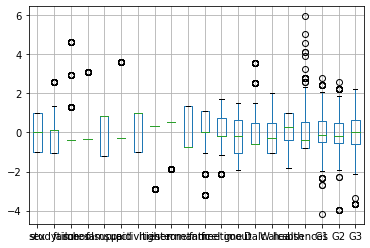

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledStandard = scaler.fit_transform(res)
dfScaled = pd.DataFrame(scaler.transform(res), columns = res.columns)
dfScaled.boxplot()

##Primjena Logističke regresije i interpretacija rezultatata

Sada su svi podatci dovedni na približno jednake mjerne ljestvice i možemo primjeniti Logističku regresiju za provjeru svoje hipoteze

Podjelimo data set na train i test set u omjeru 80/20

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfScaled.drop('sex',axis=1), 
                                                    dfScaled['sex'], test_size=0.30, random_state=101)

Korištenje modela Logističke regresije za prepoznavanje klasa

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Evaluacija rezulatata

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.69      0.72      0.71        82
         1.0       0.69      0.67      0.68        78

    accuracy                           0.69       160
   macro avg       0.69      0.69      0.69       160
weighted avg       0.69      0.69      0.69       160



Matrica konfuzija

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[59, 23],
       [26, 52]])

Zaključujemo da spol nema ulogu u navikama učenika.

##Predviđanje završne ocjene


##Ograičavanje skupa podataka

Iz ranije dobijenog seta koji sadrži podatke vezane za informacije o učenicima pokušavamo saznati informaciju o završnoj ocjeni na kraju školske godine

In [ ]:
res.columns

Index(['sex', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Izbacujemo podatake o ocjeni drugog polugodišta jer bi onda lako bilo izračunati iz podatak o prvom i drugom polugodištu konačnu ocjenu i podatke o spolu jer smo ranije zaključili da nema značajne razlike u navikama dječaka i djevojčica.

In [ ]:
res1=res.drop(['sex',  'G2'], axis=1)

In [ ]:
res1.columns


Index(['studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G3'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(res1.drop('G3',axis=1), 
                                                    res1['G3'], test_size=0.30, random_state=101)

Razdvajamo set na dio za testiranje i treniranje.

##Linearna regresija

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

0.6899063625745079


In [ ]:
print(regressor.coef_)

[ 0.14295086 -0.55689614  0.24791351  0.19170642  0.15980868  0.07619386
  0.79272584  0.29540649 -0.2529174   0.16758496 -0.15087447 -0.0397567
 -0.04275511 -0.09370505 -0.04270463  0.06565942  0.88845945]


## Evaluacija rezultata

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
sex                       
0   74       11  12.040039
    95       13  14.931277
    607      12  11.939025
1   227      11  12.883910
    395      13  12.733471
...         ...        ...
    622       9   8.530385
0   338      19  18.246205
    353      11  10.267692
    381      15  15.432672
    415      11   8.870173

[160 rows x 2 columns]

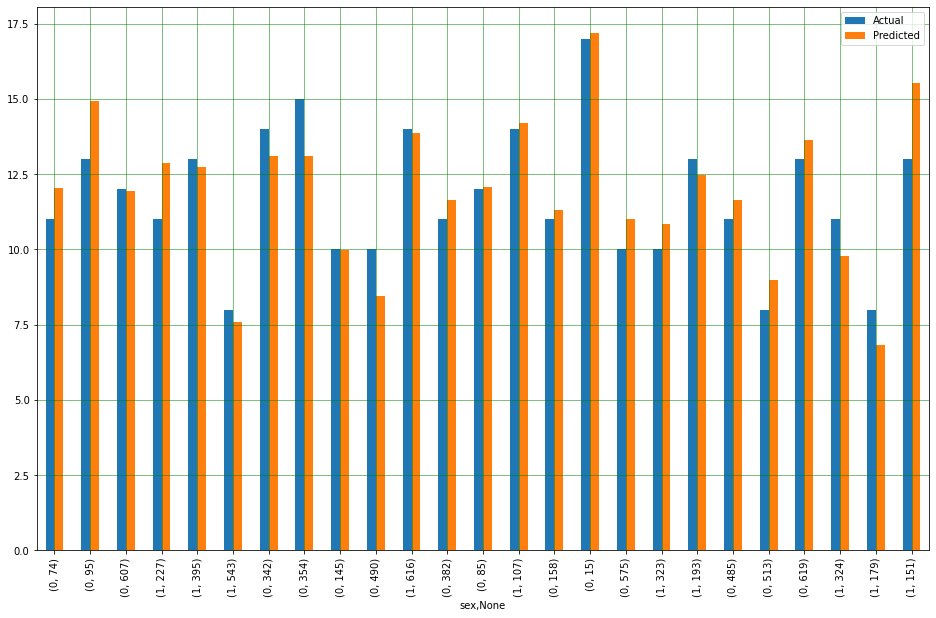

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [ 0.14295086 -0.55689614  0.24791351  0.19170642  0.15980868  0.07619386
  0.79272584  0.29540649 -0.2529174   0.16758496 -0.15087447 -0.0397567
 -0.04275511 -0.09370505 -0.04270463  0.06565942  0.88845945]
Mean squared error: 2.12
Coefficient of determination: 0.73


##Vektorizacija

In [ ]:
res.columns

Index(['sex', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
res['tot_al']=res['Dalc']+res['Walc']
res2=res.drop(['sex', 'schoolsup', 'famsup', 'paid','Dalc', 'Walc', 'G1', 'G2'],axis=1)
res2

studytime  failures  activities  higher  internet  romantic  famrel  \
sex                                                                            
0   412          2         0           1       1         1         0       4   
    183          2         0           0       1         1         1       4   
    372          2         0           0       1         0         1       4   
    610          2         3           1       0         0         1       3   
    103          2         0           0       1         1         0       4   
...            ...       ...         ...     ...       ...       ...     ...   
1   117          1         0           1       1         1         0       5   
    335          2         0           1       1         1         0       5   
    272          3         0           0       1         1         1       4   
    107          3         0           1       1         1         0       5   
    123          1         0           1       1         1         0       3   

         freetime  goout  health  absences  G3  tot_al  
sex                                                     
0   412         2      2       3         0  17       2  
    183         4      2       3         0  17       2  
    372         2      2       3         4  13       2  
    610         5      4       1         0   0       5  
    103         3      5       2        16  10       2  
...           ...    ...     ...       ...  ..     ...  
1   117         4      2       5         6  15       2  
    335         4      3       2         0  17       2  
    272         3      3       1         2  15       2  
    107         3      3       5         4  14       2  
    123         4      4       5         4  13       5  

[532 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(res2.drop('tot_al',axis=1), 
                                                    res2['tot_al'], test_size=0.30, random_state=101)

In [ ]:
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
sex                       
0   74        6   4.266333
    95        2   2.621460
    607       3   3.288453
1   227       6   5.237674
    395       4   3.299064
...         ...        ...
    622       6   4.390535
0   338       2   1.753336
    353       3   4.454989
    381       3   3.178675
    415       8   5.891602

[160 rows x 2 columns]

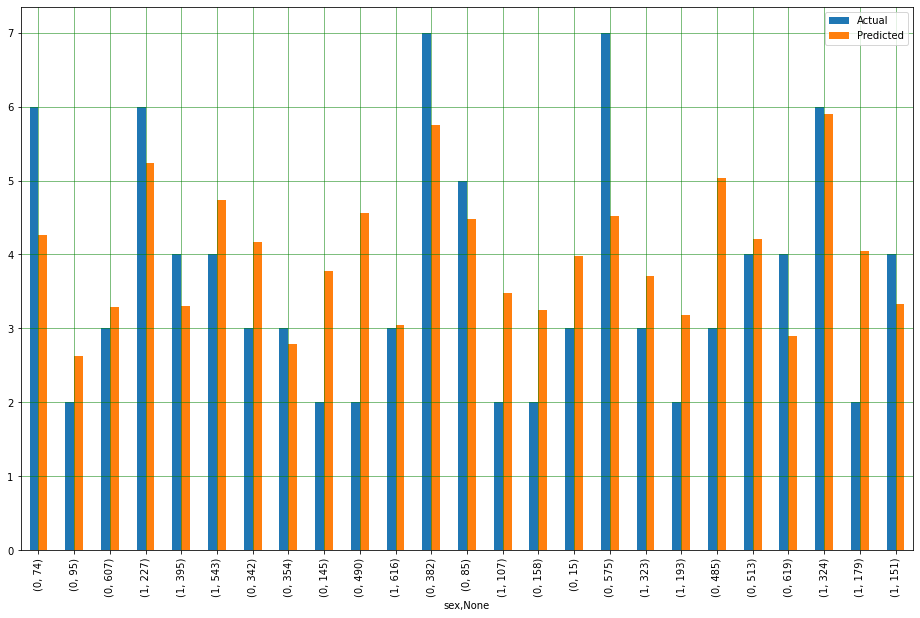

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [ 0.14295086 -0.55689614  0.24791351  0.19170642  0.15980868  0.07619386
  0.79272584  0.29540649 -0.2529174   0.16758496 -0.15087447 -0.0397567
 -0.04275511 -0.09370505 -0.04270463  0.06565942  0.88845945]
Mean squared error: 3.05
Coefficient of determination: 0.18


Rezultati su jako loši pa čemo pokušati optimizirati

# Novi odjeljak